<a href="https://colab.research.google.com/github/apriliadinir/smoothies_classification/blob/main/Smoothis_classification_on_sbuck_menu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [48]:
sbuck_menu = pd.read_csv(filepath_or_buffer = 'starbucks_drinkMenu_expanded.csv')

In [49]:
sbuck_menu.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [50]:
sbuck_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Data Preparration

## Data Transform

In [51]:
#Transform data type of Caffeine (mg) coloumn into float

sbuck_menu['Caffeine (mg)'] = sbuck_menu['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)

sbuck_menu['Caffeine (mg)'] = sbuck_menu['Caffeine (mg)'].astype(float)

## Data cleaning

In [53]:
#replace unfit data
sbuck_menu[' Total Fat (g)' ].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [54]:
sbuck_menu[' Total Fat (g)'] = sbuck_menu[' Total Fat (g)'].replace ('3 2', '3.2')

## Handle missing value

In [55]:
sbuck_menu.isna().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

In [56]:
# Filling the missing value with mean
sbuck_menu['Caffeine (mg)'] = sbuck_menu['Caffeine (mg)'].fillna(sbuck_menu['Caffeine (mg)'].mean())

## Target Label

In [57]:
sbuck_menu['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [58]:
sbuck_menu['Smoothies'] = sbuck_menu['Beverage_category'].apply(lambda x:1 if x == 'Smoothies'  else 0)
sbuck_menu = sbuck_menu.drop('Beverage_category', axis = 1)
sbuck_menu

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Smoothies
0,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0
1,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0
2,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0
3,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0
4,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0,0
238,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0,0
239,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0,0
240,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0,0


In [59]:
sbuck_menu['Smoothies'].value_counts()

0    233
1      9
Name: Smoothies, dtype: int64

## Encoding feature

In [60]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [61]:
sbuck_menu = onehot_encode(
    sbuck_menu,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [62]:
sbuck_menu

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,...,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,...,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320,3.2,0.4,0.0,0,250,67,1,64,5.0,...,0,0,0,0,1,0,0,0,0,0
238,170,0.1,0.1,0.0,0,160,39,0,38,4.0,...,0,0,0,0,0,0,1,0,0,0
239,200,3.5,2.0,0.1,10,160,39,0,38,3.0,...,0,0,0,0,0,0,0,0,0,1
240,180,1.5,0.2,0.0,0,160,37,1,35,3.0,...,0,0,0,0,1,0,0,0,0,0


# Standard Scalling

In [63]:
#replace unfit unit
sbuck_menu = sbuck_menu.applymap(lambda x:np.float(str(x).replace('%','')))
sbuck_menu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320.0,3.2,0.4,0.0,0.0,250.0,67.0,1.0,64.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
238,170.0,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
239,200.0,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240,180.0,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
Y = sbuck_menu['Smoothies'].astype(np.int).copy()
X = sbuck_menu.drop('Smoothies',axis = 1).copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [65]:
Scaler = StandardScaler ()
X = Scaler.fit_transform(X)

#Modelling

# Train-Test Split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.6, random_state = 1)

## Modelling

In [67]:
#Machine Learning Modelling using Tensorflow

inputs = tf.keras.Input(shape=(61,))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ],
    verbose=0
)

#Evaluation

In [68]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0734 - accuracy: 0.9691 - auc: 1.0000


[0.07340525835752487, 0.969072163105011, 1.0]

In [69]:
Y_true = np.array(Y_test)
Y_pred = np.squeeze(np.array((model.predict(X_test) >= 0.5), dtype = np.int))
cm = confusion_matrix(Y_true, Y_pred)
cm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[92,  0],
       [ 3,  2]])

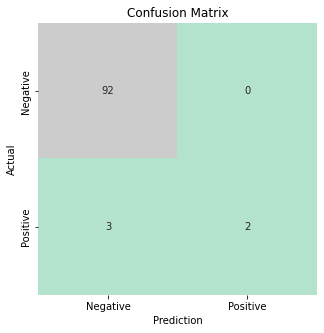

In [70]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot = True, cmap='Pastel2' , cbar = False)

plt.xlabel('Prediction')
plt.xticks(np.arange(2) + 0.5, ["Negative","Positive"])

plt.ylabel('Actual')
plt.yticks(np.arange(2) + 0.5, ["Negative","Positive"])

plt.title ('Confusion Matrix')

plt.show()